<a href="https://colab.research.google.com/github/viktoruebelhart/studies/blob/main/Intro_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte: https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices

# Carregando Bibliotecas

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Carregando Dataset

In [4]:
houses = pd.read_csv('/content/data.csv')
houses.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [5]:
houses.shape

(11657, 8)

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [7]:
houses.nunique()

,0
address,5348
district,1199
area,381
bedrooms,7
garage,7
type,4
rent,1662
total,5571


In [8]:
houses['type'].unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [9]:
houses_final = houses.drop(columns=['address', 'district'])

In [10]:
houses_final.head()

,area,bedrooms,garage,type,rent,total
0,21,1,0,Studio e kitnet,2400,2939
1,15,1,1,Studio e kitnet,1030,1345
2,18,1,0,Apartamento,4000,4661
3,56,2,2,Casa em condomínio,1750,1954
4,19,1,0,Studio e kitnet,4000,4654


In [11]:
houses_final['garage'].value_counts()

,count
garage,
1,4574
0,4118
2,1908
3,539
4,321
5,112
6,85


In [12]:
houses_final['bedroom_and_garage'] = np.where((houses_final['bedrooms']>0 ) & (houses_final['garage']>0), 1, 0)
houses_final.head()

,area,bedrooms,garage,type,rent,total,bedroom_and_garage
0,21,1,0,Studio e kitnet,2400,2939,0
1,15,1,1,Studio e kitnet,1030,1345,1
2,18,1,0,Apartamento,4000,4661,0
3,56,2,2,Casa em condomínio,1750,1954,1
4,19,1,0,Studio e kitnet,4000,4654,0


In [13]:
houses_final['extra_cost'] = houses_final['total']-houses_final['rent']
houses_final.head()

,area,bedrooms,garage,type,rent,total,bedroom_and_garage,extra_cost
0,21,1,0,Studio e kitnet,2400,2939,0,539
1,15,1,1,Studio e kitnet,1030,1345,1,315
2,18,1,0,Apartamento,4000,4661,0,661
3,56,2,2,Casa em condomínio,1750,1954,1,204
4,19,1,0,Studio e kitnet,4000,4654,0,654


In [14]:
houses_final['bedroom_and_garage'].value_counts()

,count
bedroom_and_garage,
1,7535
0,4122


In [15]:
#modelo
from sklearn.model_selection import train_test_split

X = houses_final.drop(['rent','total'], axis=1)
y = houses_final['rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9325, 6), (2332, 6), (9325,), (2332,))

In [17]:
#método sem Pipeline e sem ColumnTransformer

In [18]:
categorical_features = ['type']
numerical_features = ['area', 'bedrooms', 'garage', 'bedroom_and_garage', 'extra_cost']

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
X_train_categorical = ohe.fit_transform(X_train[categorical_features])
X_test_categorical = ohe.transform(X_test[categorical_features])

In [20]:
X_train_categorical

<9325x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3572 stored elements in Compressed Sparse Row format>

In [21]:
X_train_processed = pd.concat([pd.DataFrame(X_train_categorical.toarray()), X_train[numerical_features].reset_index()], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_categorical.toarray()), X_test[numerical_features].reset_index()], axis=1)

In [22]:
X_train_processed

,0,1,2,index,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,9000,80,3,1,1,698
1,1.0,0.0,0.0,5378,70,2,0,0,265
2,0.0,1.0,0.0,10605,175,1,0,0,151
3,1.0,0.0,0.0,11396,375,4,4,1,1970
4,0.0,0.0,0.0,6605,60,2,1,1,790
...,...,...,...,...,...,...,...,...,...
9320,0.0,0.0,0.0,11284,156,3,1,1,2220
9321,0.0,0.0,0.0,5191,50,2,1,1,592
9322,0.0,0.0,0.0,5390,65,2,1,1,849
9323,0.0,0.0,0.0,860,60,2,1,1,1274


In [23]:
X_train_processed

,0,1,2,index,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,9000,80,3,1,1,698
1,1.0,0.0,0.0,5378,70,2,0,0,265
2,0.0,1.0,0.0,10605,175,1,0,0,151
3,1.0,0.0,0.0,11396,375,4,4,1,1970
4,0.0,0.0,0.0,6605,60,2,1,1,790
...,...,...,...,...,...,...,...,...,...
9320,0.0,0.0,0.0,11284,156,3,1,1,2220
9321,0.0,0.0,0.0,5191,50,2,1,1,592
9322,0.0,0.0,0.0,5390,65,2,1,1,849
9323,0.0,0.0,0.0,860,60,2,1,1,1274


In [24]:
X_train_processed = X_train_processed.drop(columns='index')
X_test_processed = X_test_processed.drop(columns='index')

In [25]:
X_train_processed

,0,1,2,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,80,3,1,1,698
1,1.0,0.0,0.0,70,2,0,0,265
2,0.0,1.0,0.0,175,1,0,0,151
3,1.0,0.0,0.0,375,4,4,1,1970
4,0.0,0.0,0.0,60,2,1,1,790
...,...,...,...,...,...,...,...,...
9320,0.0,0.0,0.0,156,3,1,1,2220
9321,0.0,0.0,0.0,50,2,1,1,592
9322,0.0,0.0,0.0,65,2,1,1,849
9323,0.0,0.0,0.0,60,2,1,1,1274


In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [28]:
houses.nunique()

,0
address,5348
district,1199
area,381
bedrooms,7
garage,7
type,4
rent,1662
total,5571


In [29]:
houses.type.unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [30]:
houses = houses.drop(columns=['address', 'district'])

In [31]:
houses.head()

,area,bedrooms,garage,type,rent,total
0,21,1,0,Studio e kitnet,2400,2939
1,15,1,1,Studio e kitnet,1030,1345
2,18,1,0,Apartamento,4000,4661
3,56,2,2,Casa em condomínio,1750,1954
4,19,1,0,Studio e kitnet,4000,4654


In [32]:
houses['bedroom_and_garage'] = np.where((houses['bedrooms']>0) & (houses['garage']>0), 1, 0)
houses.head()

,area,bedrooms,garage,type,rent,total,bedroom_and_garage
0,21,1,0,Studio e kitnet,2400,2939,0
1,15,1,1,Studio e kitnet,1030,1345,1
2,18,1,0,Apartamento,4000,4661,0
3,56,2,2,Casa em condomínio,1750,1954,1
4,19,1,0,Studio e kitnet,4000,4654,0


In [33]:
houses['extra_cost'] = houses['total']-houses['rent']

# Modelo Preditivo

In [34]:
from sklearn.model_selection import train_test_split

X = houses.drop(['rent','total'], axis=1)
y = houses['rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9325, 6), (2332, 6), (9325,), (2332,))

In [36]:
X_train

,area,bedrooms,garage,type,bedroom_and_garage,extra_cost
9000,80,3,1,Apartamento,1,698
5378,70,2,0,Casa,0,265
10605,175,1,0,Casa em condomínio,0,151
11396,375,4,4,Casa,1,1970
6605,60,2,1,Apartamento,1,790
...,...,...,...,...,...,...
11284,156,3,1,Apartamento,1,2220
5191,50,2,1,Apartamento,1,592
5390,65,2,1,Apartamento,1,849
860,60,2,1,Apartamento,1,1274


#### Método sem Pipeline e sem ColumnTransformer

In [37]:
categorical_features = ['type']
numerical_features = ['area', 'bedrooms', 'garage', 'bedroom_and_garage', 'extra_cost']


In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
X_train_categorical = ohe.fit_transform(X_train[categorical_features])
X_test_categorical = ohe.transform(X_test[categorical_features])

In [39]:
len(X_train_categorical.toarray())

9325

In [40]:
X_train_processed = pd.concat([pd.DataFrame(X_train_categorical.toarray()), X_train[numerical_features].reset_index()], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_categorical.toarray()), X_test[numerical_features].reset_index()], axis=1)

X_train_processed.shape

(9325, 9)

In [41]:
X_train_processed = X_train_processed.drop(columns='index')
X_test_processed = X_test_processed.drop(columns='index')

In [42]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [43]:
xgb = XGBRegressor()

xgb.fit(X_train_processed, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = xgb.predict(X_test_processed)

In [45]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2525610.7065990483


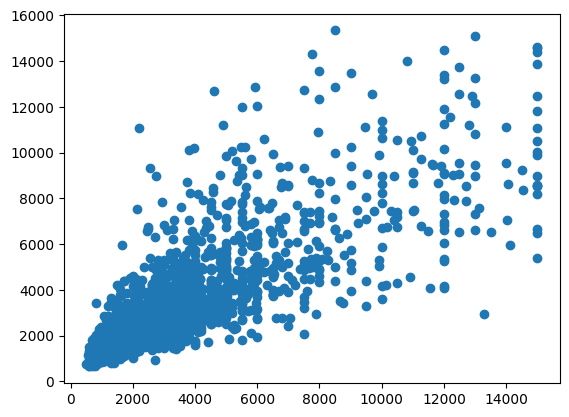

In [46]:
plt.scatter(y_test, y_pred)

#### Como seria com Column Transformer?

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_features = ['type']
numerical_features = ['area', 'bedrooms', 'garage', 'bedroom_and_garage', 'extra_cost']

transformations = [
    ('ohe', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numerical_features),
]

preprocessor = ColumnTransformer(transformers=transformations)


In [48]:
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_test_transformed = preprocessor.transform(X_test)

In [49]:
xgb.fit(X_train_transformed, np.log(y_train))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = xgb.predict(X_test_transformed)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(np.log(y_test), y_pred))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(np.log(y_test), y_pred)
print(f"MAE: {mae}")

mape = np.mean(np.abs((np.log(y_test) - y_pred) / np.log(y_test))) * 100
print(f"MAPE: {mape:.2f}%")


RMSE: 0.35566566211404504
MAE: 0.2762949508655595
MAPE: 3.50%


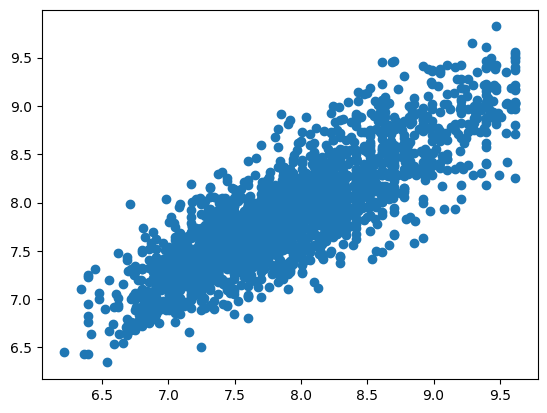

In [51]:
plt.scatter(np.log(y_test), y_pred)